# Student Performance Indicator
## Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation Course.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/students.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [5]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [8]:
# Check the data types of the columns and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
# Check the unique values in the object columns
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())
    print()

gender
female    518
male      482
Name: count, dtype: int64

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test_preparation_course
none         642
completed    358
Name: count, dtype: int64



In [13]:
# Define the numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print the number of numerical and categorical features
print('Total Features:', len(df.columns))
print('Numeric Features:', len(numeric_features), numeric_features)
print('Categorical Features:', len(categorical_features), categorical_features)

Total Features: 8
Numeric Features: 3 ['math_score', 'reading_score', 'writing_score']
Categorical Features: 5 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


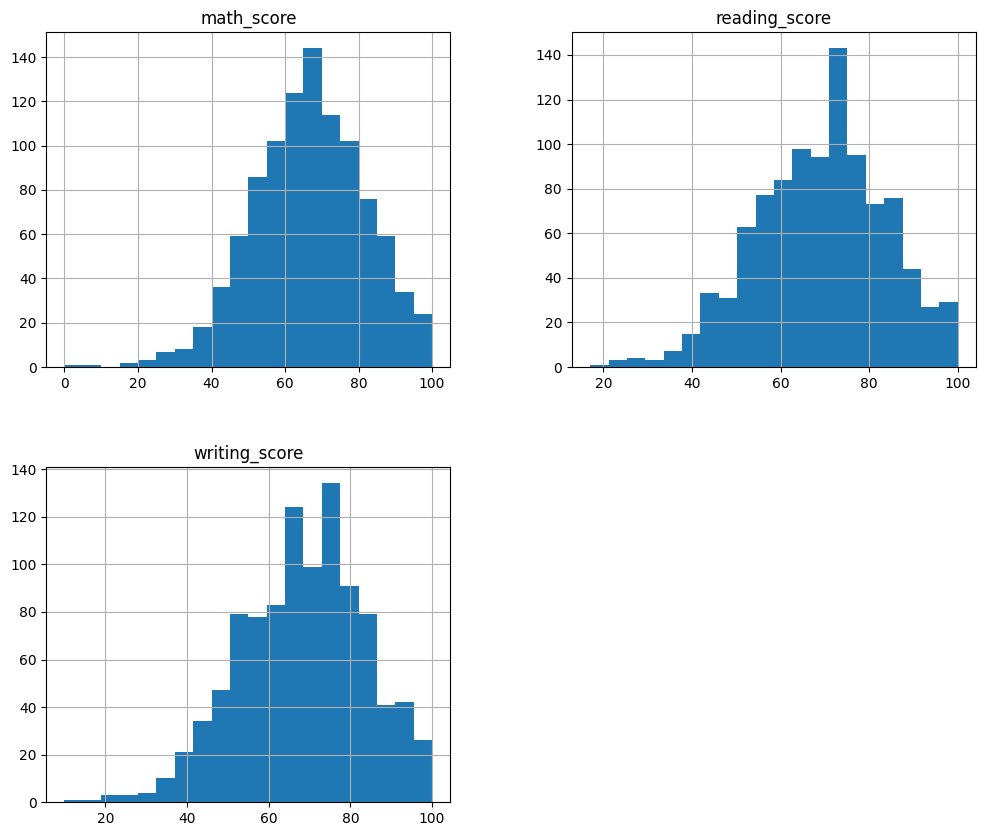

In [14]:
df.hist(figsize=(12, 10), 
        bins=20);

### 3.8 Adding columns for "Total Score" and "Average"

In [15]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/ 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
# Creating variables for the number of students with full marks in each subject
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

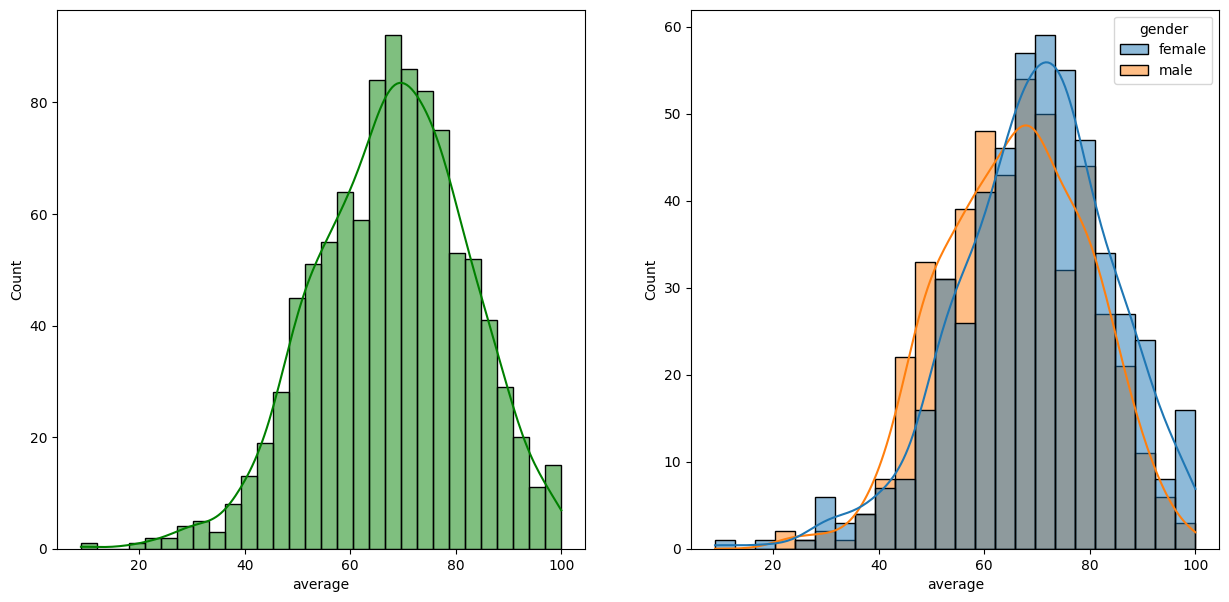

In [18]:
# Create new figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plotting the distribution of the average scores
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')

# Plotting the distribution of the average by gender
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True,  hue='gender');

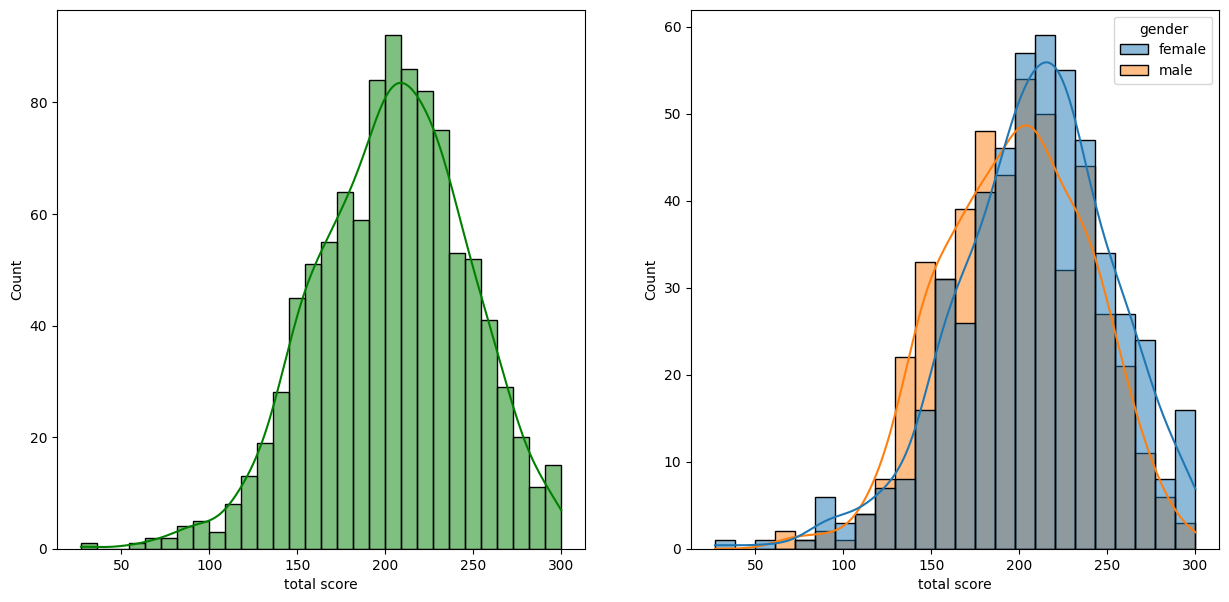

In [19]:
# Create new figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plotting the distribution of the total scores
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')

# Plotting the distribution of the total scores by gender
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender');

#####  Insights
- Female students tend to perform well then male students.

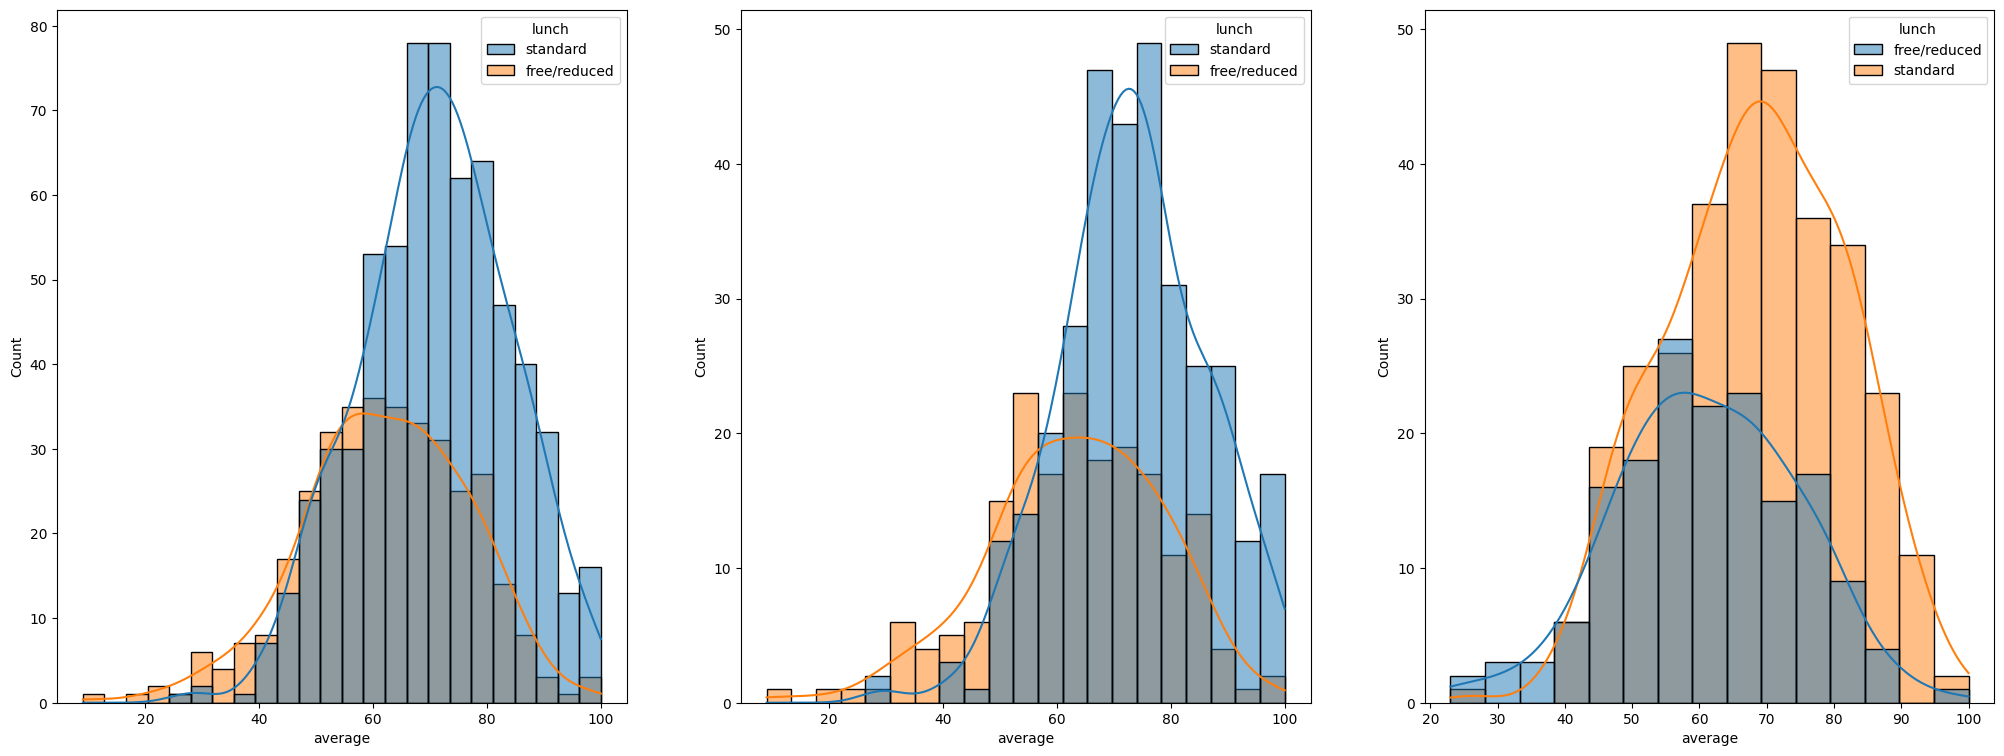

In [20]:
# Create new figure
fig, axs = plt.subplots(1, 3, figsize=(25, 9))

# Plotting the distribution of the average scores vs lunch
plt.subplot(131)
sns.histplot(data=df, x='average',kde=True, hue='lunch')

# Plotting the distribution of the average scores for females vs lunch
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')

# Plotting the distribution of the average scores for males vs lunch
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch');

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


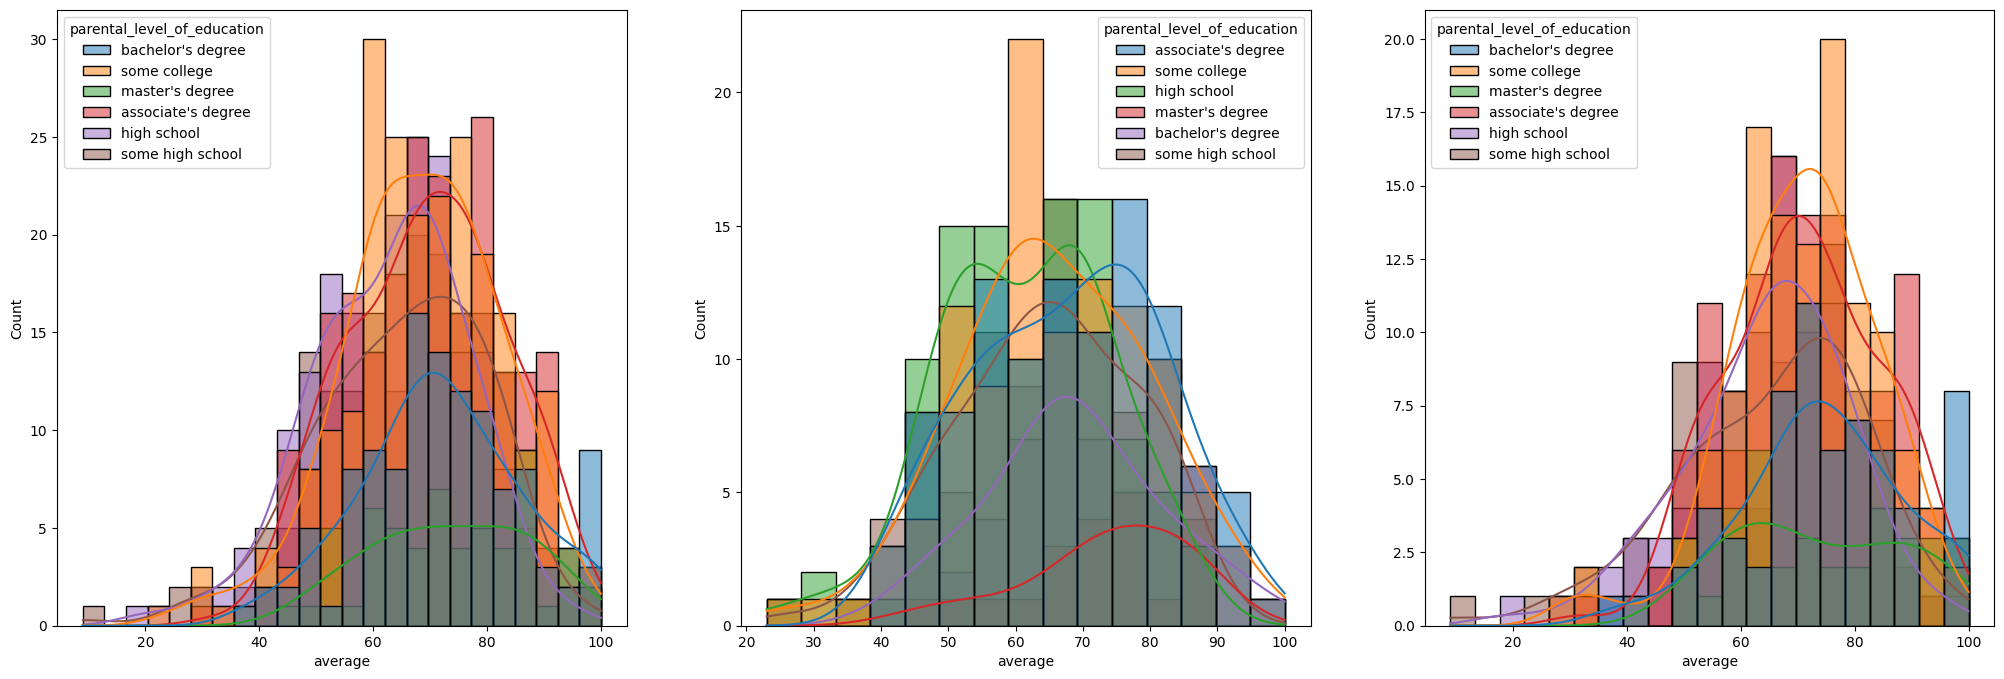

In [22]:
# Create new figure
fig, axs = plt.subplots(1, 3, figsize=(25, 8))

# Plotting the distribution of the average scores vs parental level of education
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')

# Plotting the distribution of the average scores vs parental level of education for females
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')

# Plotting the distribution of the average scores vs parental level of education for males
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education');

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

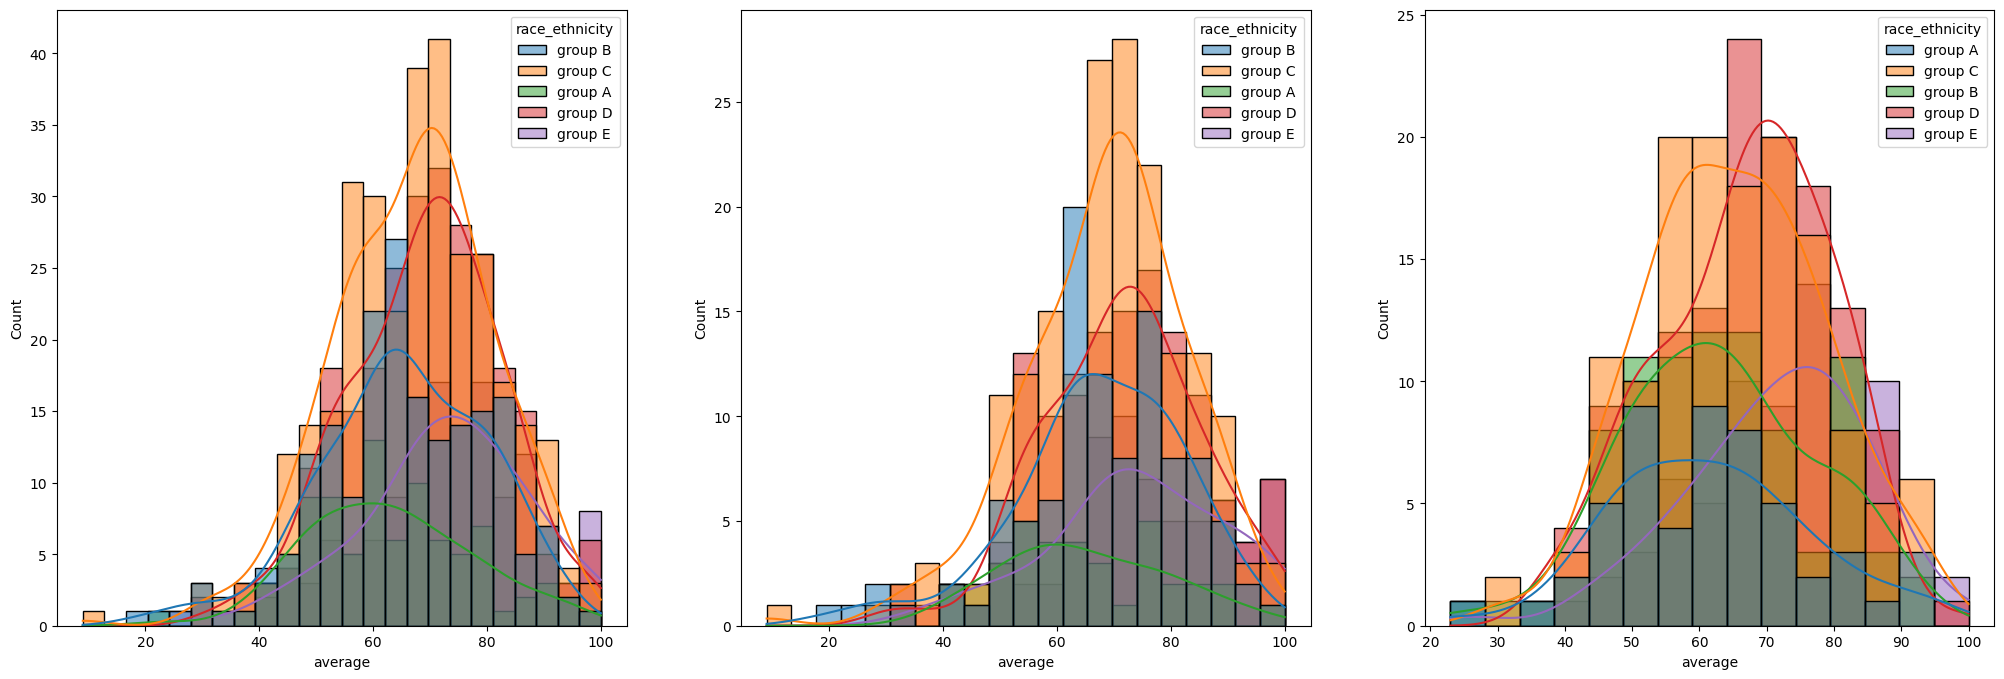

In [23]:
# Create new figure
fig, axs = plt.subplots(1,3,figsize=(25,8))

# Plotting the distribution of the average scores vs race / ethnicity
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')

# # Plotting the distribution of the average scores vs race / ethnicity for female
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')

# Plotting the distribution of the average scores vs race / ethnicity for male
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity');

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

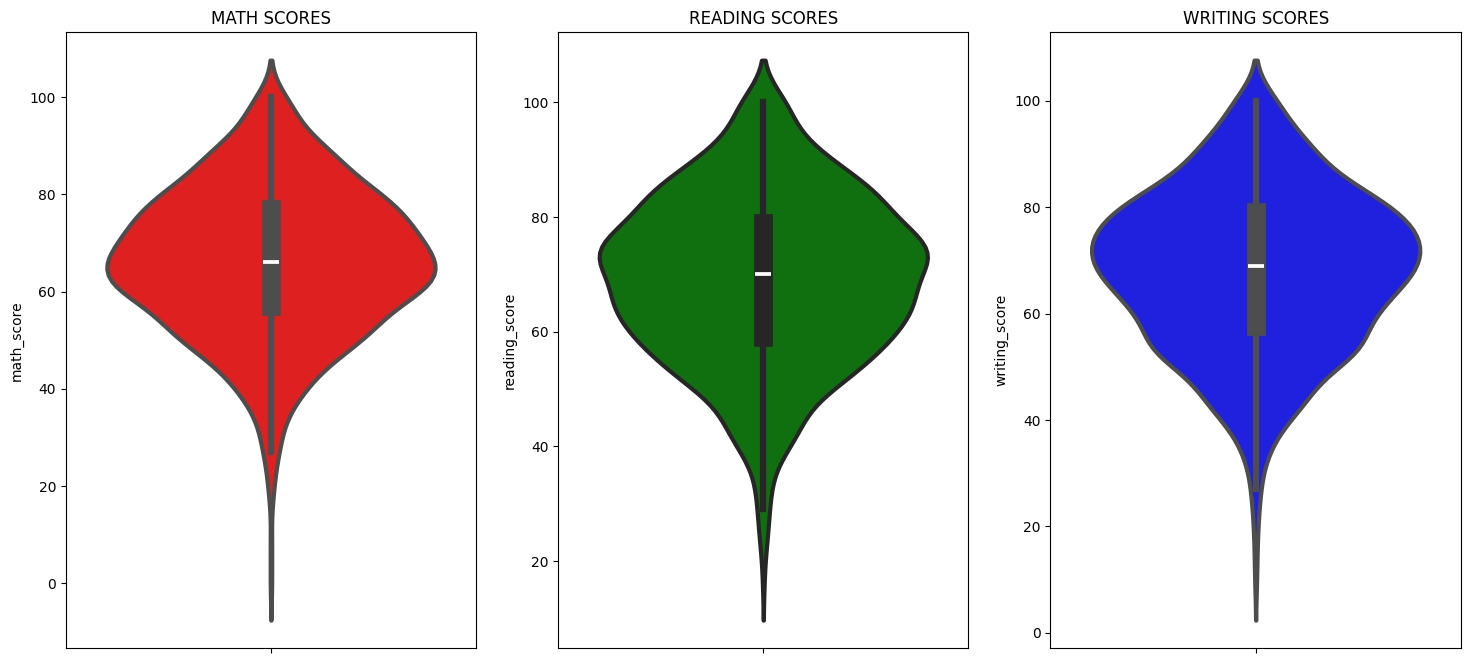

In [24]:
# Create new figure
fig, axs = plt.subplots(1,3,figsize=(18,8))

# Plot a violin plot of the math scores
plt.subplot(131)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

# Plot a violin plot of the reading scores
plt.subplot(132)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

# Plot a violin plot of the writing scores
plt.subplot(133)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue',linewidth=3);

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


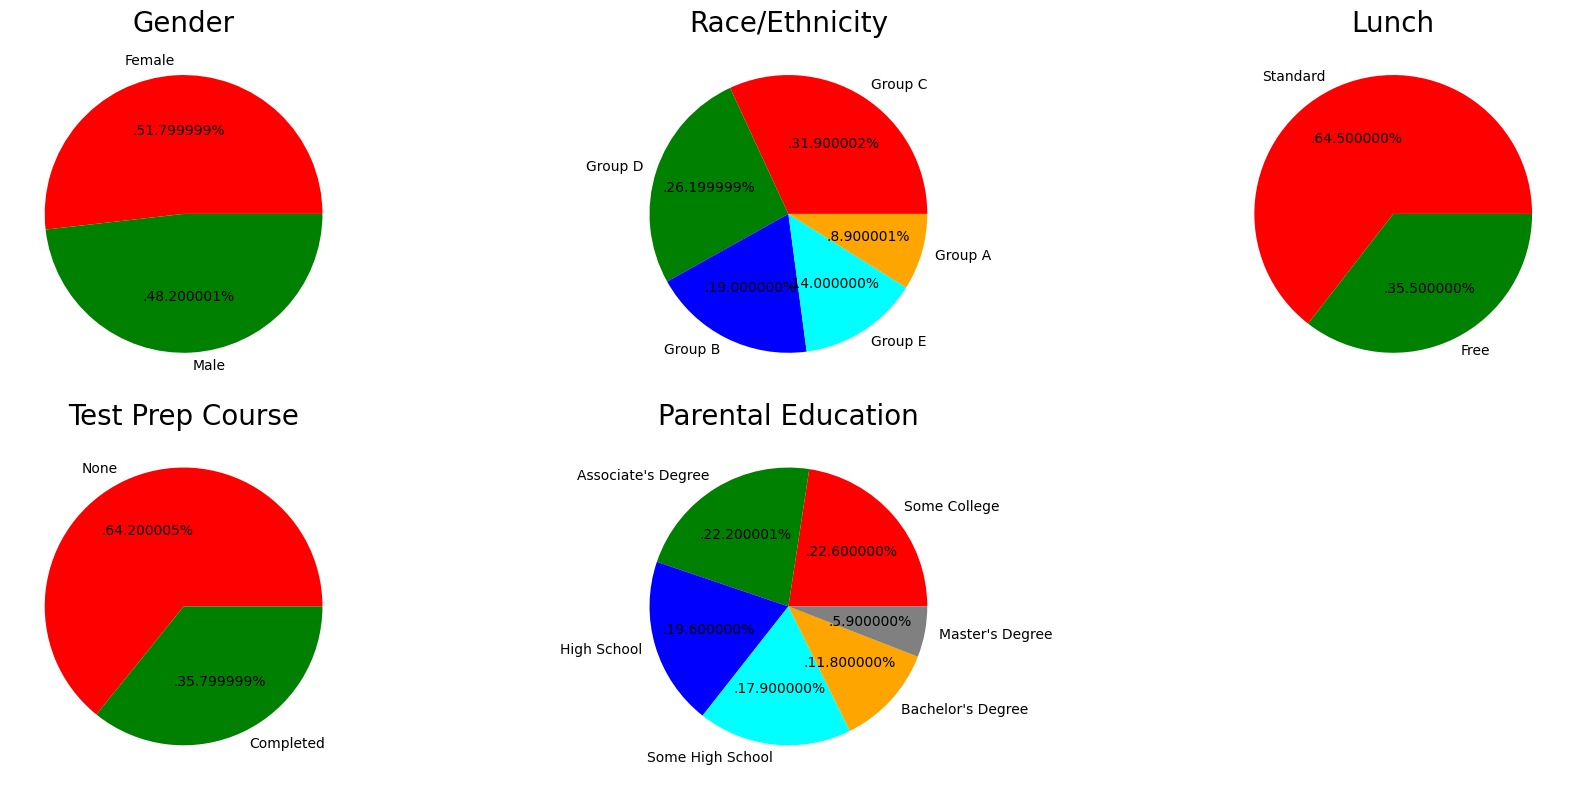

In [26]:
# Create new figure
fig, axs = plt.subplots(2,3,figsize=(18,8))

# Plot a pie chart of gender distribution
plt.subplot(231)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

# Plot a pie of race / ethnicity distribution
plt.subplot(232)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

# Plot a pie of lunch distribution
plt.subplot(233)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

# Plot a pie of test preparation course distribution
plt.subplot(234)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Prep Course', fontsize = 20)
plt.axis('off')

# Plot a pie of parental level of education distribution
plt.subplot(235)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

# Remove the unused subplot (236t)
fig.delaxes(axs[1, 2])

plt.tight_layout();

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

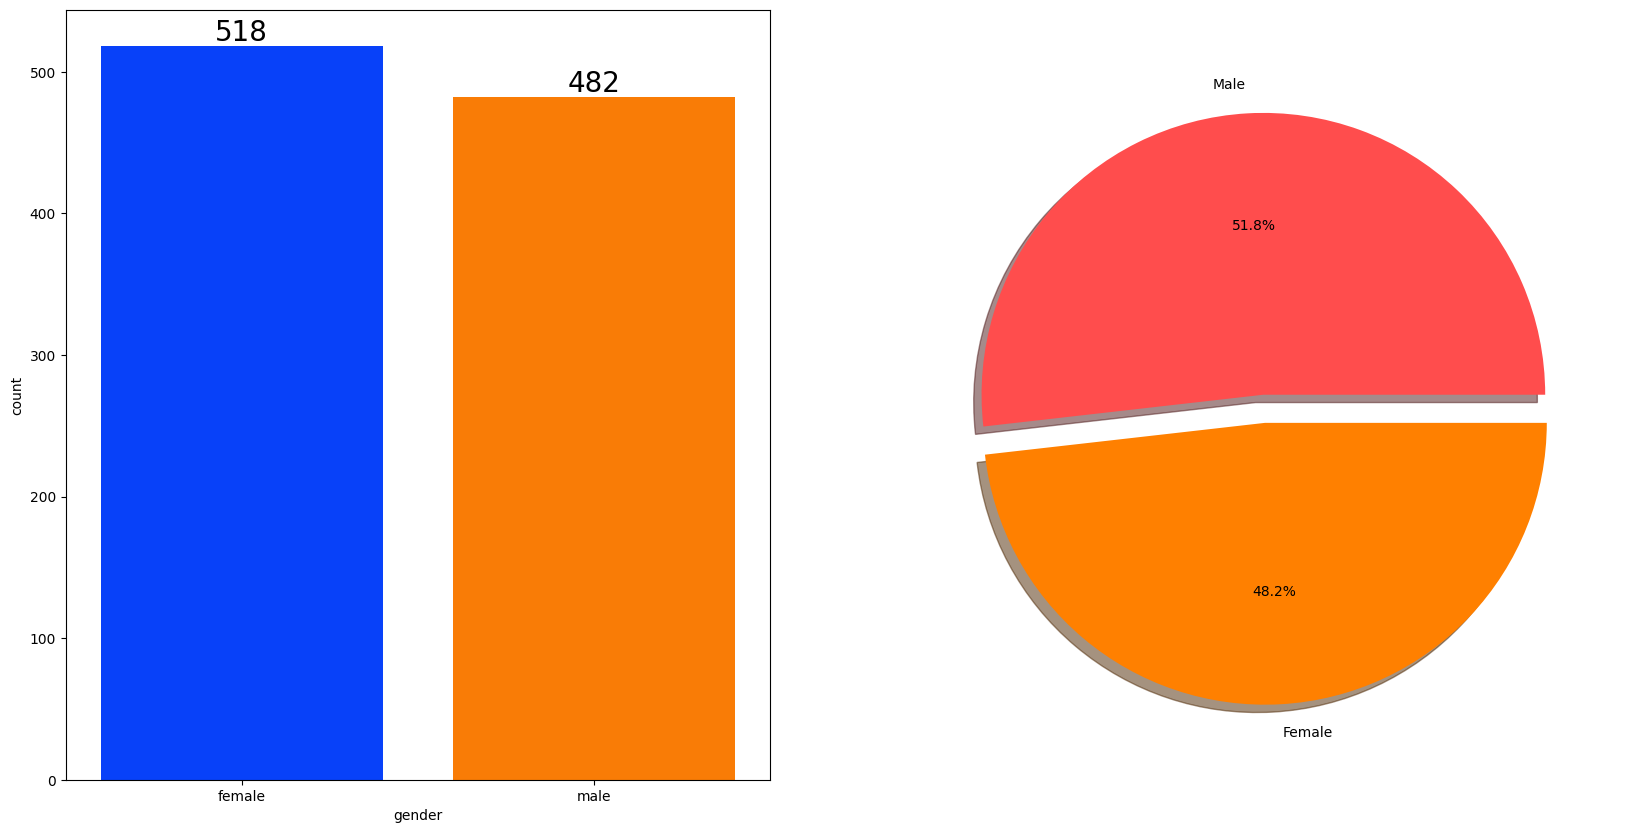

In [29]:
# Create new figure
fig, ax = plt.subplots(1,2,figsize=(20,10))

# Plot a count plot of the 
sns.countplot(x=df['gender'],
              data=df,
              hue=df['gender'],
              palette ='bright',
              ax=ax[0],
              saturation=0.95)

# For loop to add the count labels on the bars
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),
        labels=['Male','Female'],
        explode=[0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        colors=['#ff4d4d','#ff8000']);

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [28]:
# Group the data by gender and calculate the mean for numeric columns
gender_group = df.groupby('gender')[numeric_features].mean()
gender_group

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


/var/folders/33/fh44bjyj7d99qtmc24__wm5h0000gp/T/ipykernel_3147/4238083725.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_math_scores = [gender_group['average'][0], gender_group['math_score'][0]]
/var/folders/33/fh44bjyj7d99qtmc24__wm5h0000gp/T/ipykernel_3147/4238083725.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_math_scores = [gender_group['average'][1], gender_group['math_score'][1]]
/var/folders/33/fh44bjyj7d99qtmc24__wm5h0000gp/T/ipykernel_3147/4238083725.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be t

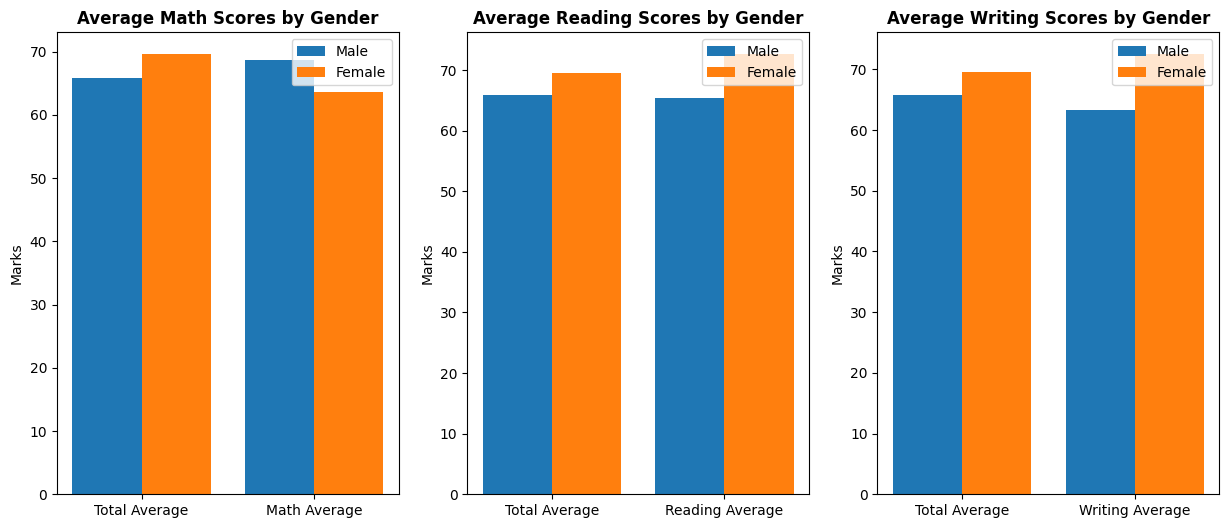

In [30]:
# Create new figure
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Create a column for the average scores
gender_group['average'] = df.groupby('gender')['average'].mean()

# Create an X-axis labels for the plot
X_math = ['Total Average', 'Math Average']
X_reading = ['Total Average', 'Reading Average']
X_writing = ['Total Average', 'Writing Average']

# Average math scores by gender
female_math_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_math_scores = [gender_group['average'][1], gender_group['math_score'][1]]

# Average reading scores by gender
female_reading_scores = [gender_group['average'][0], gender_group['reading_score'][0]]
male_reading_scores = [gender_group['average'][1], gender_group['reading_score'][1]]

# Average writing scores by gender
female_writing_scores = [gender_group['average'][0], gender_group['writing_score'][0]]
male_writing_scores = [gender_group['average'][1], gender_group['writing_score'][1]]

X_axis_math = np.arange(len(X_math))
X_axis_reading = np.arange(len(X_reading))
X_axis_writing = np.arange(len(X_writing))

# Plotting the bar chart for the average math scores
plt.subplot(131)
plt.bar(X_axis_math - 0.2, male_math_scores, 0.4, label='Male')
plt.bar(X_axis_math + 0.2, female_math_scores, 0.4, label='Female')

plt.xticks(X_axis_math, X_math)
plt.ylabel("Marks")
plt.title("Average Math Scores by Gender", fontweight='bold')
plt.legend()

# Plotting the bar chart for the average reading scores
plt.subplot(132)
plt.bar(X_axis_reading - 0.2, male_reading_scores, 0.4, label='Male')
plt.bar(X_axis_reading + 0.2, female_reading_scores, 0.4, label='Female')

plt.xticks(X_axis_reading, X_reading)
plt.ylabel("Marks")
plt.title("Average Reading Scores by Gender", fontweight='bold')
plt.legend()

# Plotting the bar chart for the average writing scores
plt.subplot(133)
plt.bar(X_axis_writing - 0.2, male_writing_scores, 0.4, label='Male')
plt.bar(X_axis_writing + 0.2, female_writing_scores, 0.4, label='Female')

plt.xticks(X_axis_writing, X_writing)
plt.ylabel("Marks")
plt.title("Average Writing Scores by Gender", fontweight='bold')
plt.legend();

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

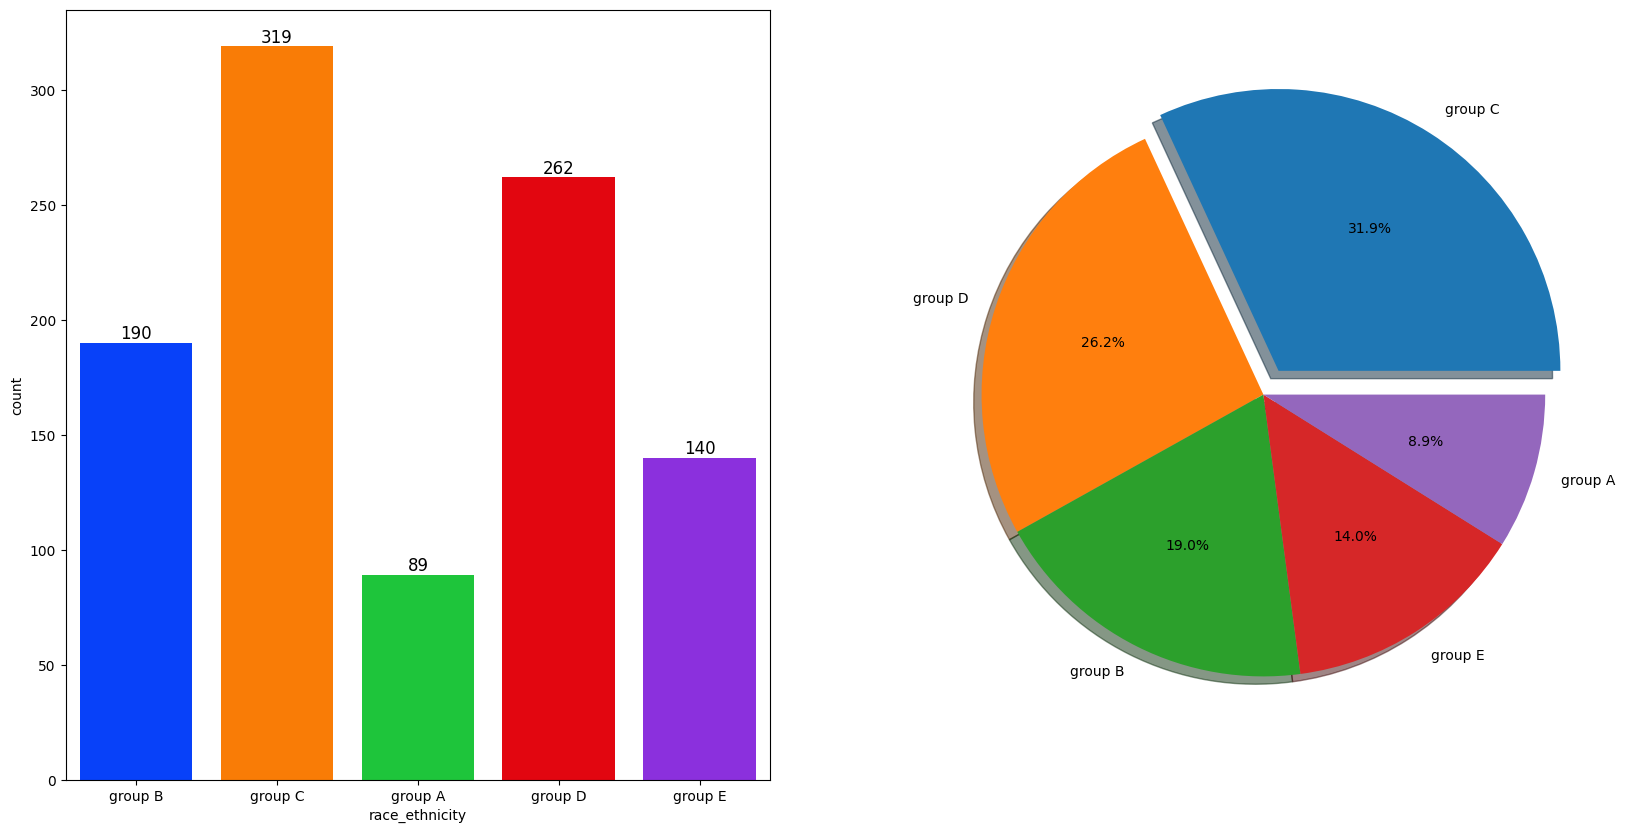

In [37]:
# Create new figure
fig, ax = plt.subplots(1,2,figsize=(20,10))

# Plot a count of race / ethnicity
sns.countplot(x=df['race_ethnicity'],
              hue=df['race_ethnicity'],
              data=df,
              palette='bright',
              ax=ax[0],
              saturation=0.95)

# Loop through the containers to add the count labels on the bars
for container in ax[0].containers:
    ax[0].bar_label(container,
                    color='black',
                    size=12)

# Plot a pie chart of the race / ethnicity distribution
plt.pie(x = df['race_ethnicity'].value_counts(),
        labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0],
        autopct='%1.1f%%',
        shadow=True);

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

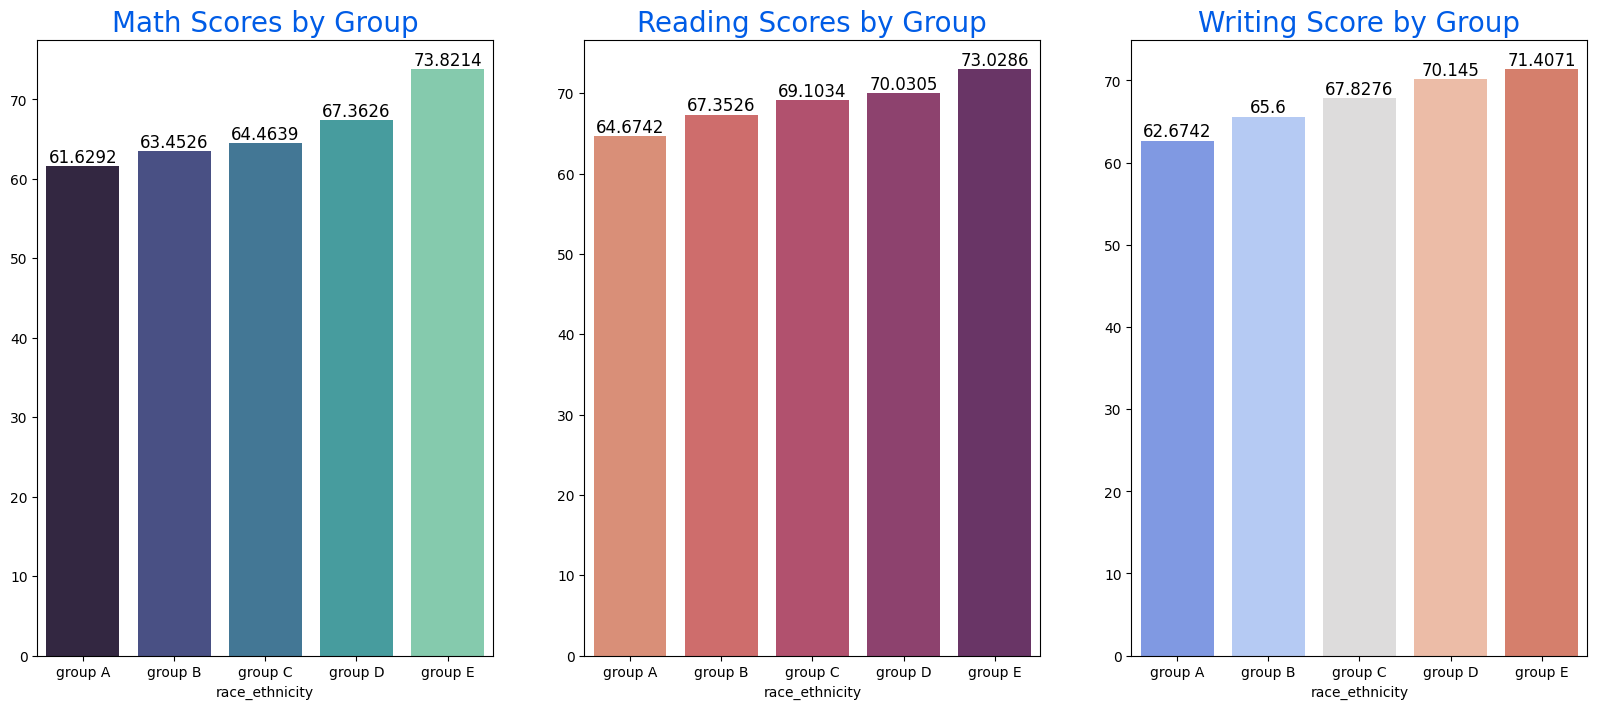

In [43]:
# Group the data by race / ethnicity and calculate the mean for numeric columns
group_data_2 = df.groupby('race_ethnicity')

# Create a new figure
fig, ax = plt.subplots(1,3,figsize=(20,8))

# Create a bar plot of the average math scores
sns.barplot(x=group_data_2['math_score'].mean().index,
            y=group_data_2['math_score'].mean().values,
            hue=group_data_2['math_score'].mean().index,
            palette='mako',
            ax=ax[0])

# Set the title of the plot
ax[0].set_title('Math Scores by Group',
                color='#005ce6',
                size=20)

# Loop through the containers to add the count labels on the bars
for container in ax[0].containers:
    ax[0].bar_label(container,
                    color='black',
                    size=12)

# Create a bar plot of the average reading scores
sns.barplot(x=group_data_2['reading_score'].mean().index,
            y=group_data_2['reading_score'].mean().values,
            hue=group_data_2['reading_score'].mean().index,
            palette='flare',
            ax=ax[1])

# Set the title of the plot
ax[1].set_title('Reading Scores by Group',
                color='#005ce6',
                size=20)

# Loop through the containers to add the count labels on the bars
for container in ax[1].containers:
    ax[1].bar_label(container,
                    color='black',
                    size=12)

# Create a bar plot of the average writing scores
sns.barplot(x=group_data_2['writing_score'].mean().index,
            y=group_data_2['writing_score'].mean().values,
            hue=group_data_2['writing_score'].mean().index,
            palette='coolwarm',
            ax=ax[2])

# Set the title of the plot
ax[2].set_title('Writing Score by Group',
                color='#005ce6',
                size=20)

# Loop through the containers to add the count labels on the bars
for container in ax[2].containers:
    ax[2].bar_label(container,
                    color='black',
                    size=12)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

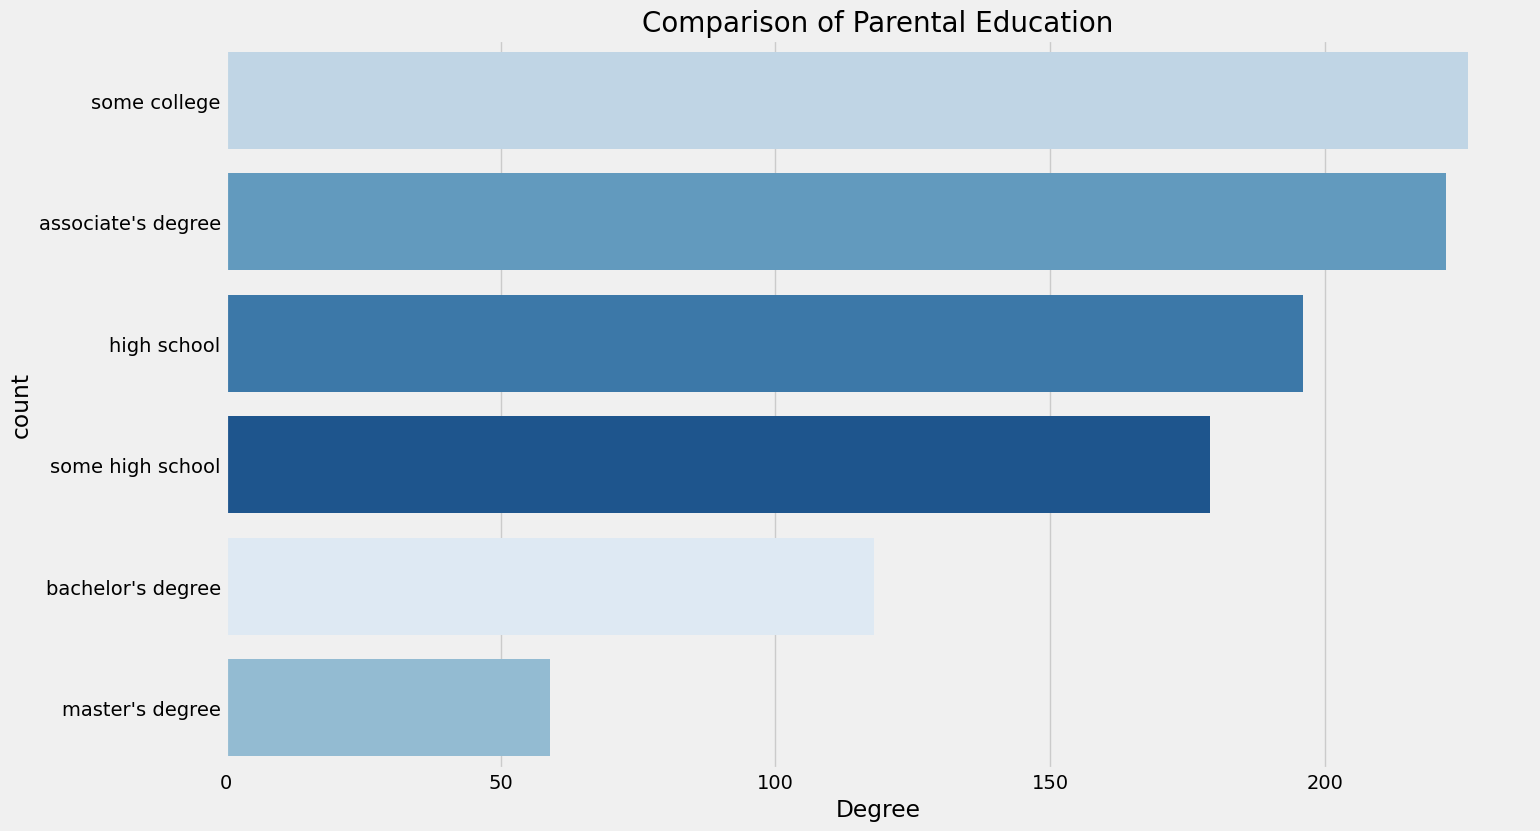

In [48]:
# Create new figure
plt.rcParams['figure.figsize'] = (15, 9)

# Select specific style
plt.style.use('fivethirtyeight')

# Get the counts of each category in 'parental_level_of_education' and sort them
sorted_counts = df['parental_level_of_education'].value_counts().sort_values(ascending=False)

# Create a count plot parent level of education
sns.countplot(y=df['parental_level_of_education'],
              hue=df['parental_level_of_education'], 
              palette='Blues',
              order=sorted_counts.index)

# Adding title and labels
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count');

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

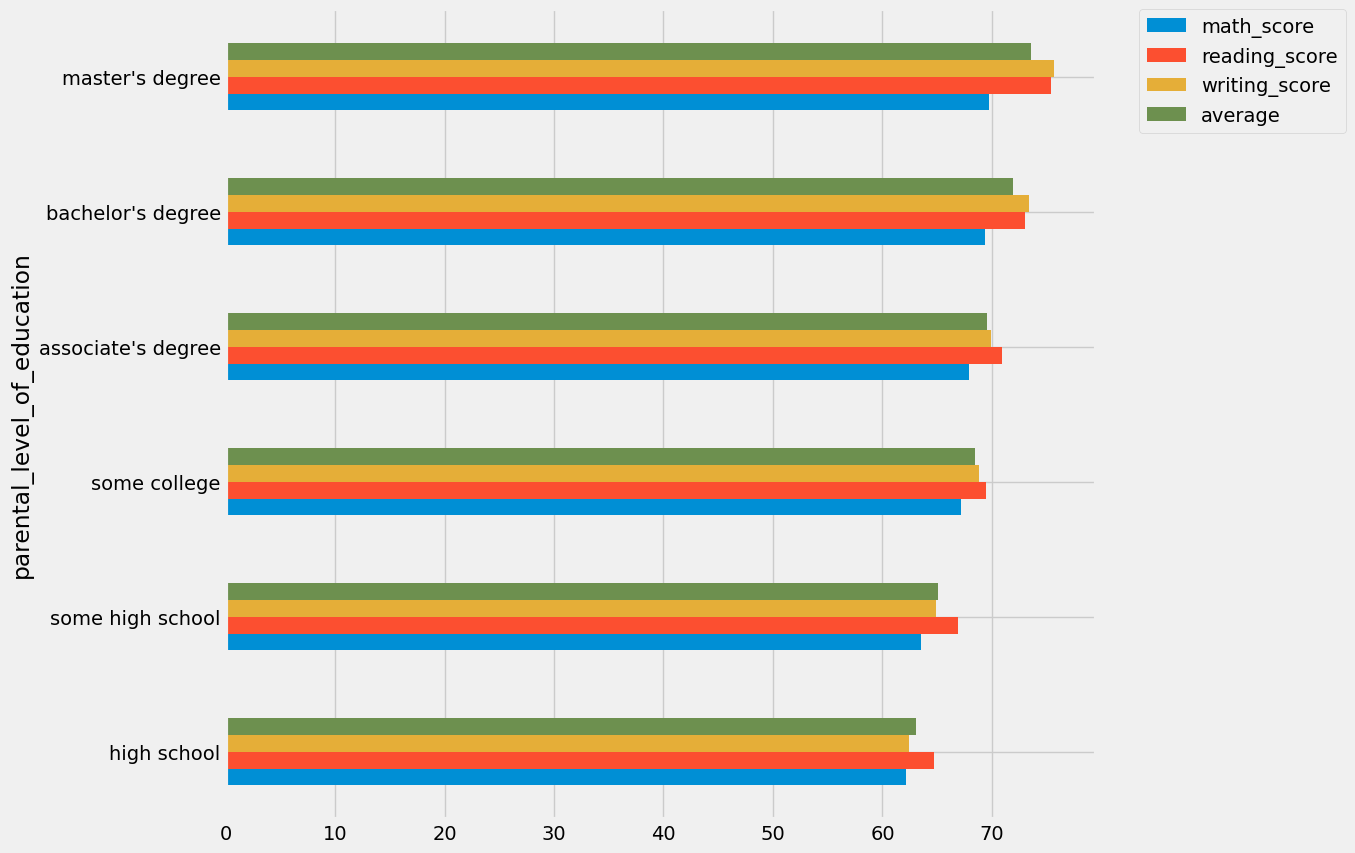

In [64]:
# Calculate the mean values and sort them
score_means = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score', 'average']].mean()
sorted_means = score_means.sort_values(by='average')

# Plot the sorted DataFrame
sorted_means.plot(kind='barh', figsize=(10, 10))

# Add legend and adjust its position
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad=0.);

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

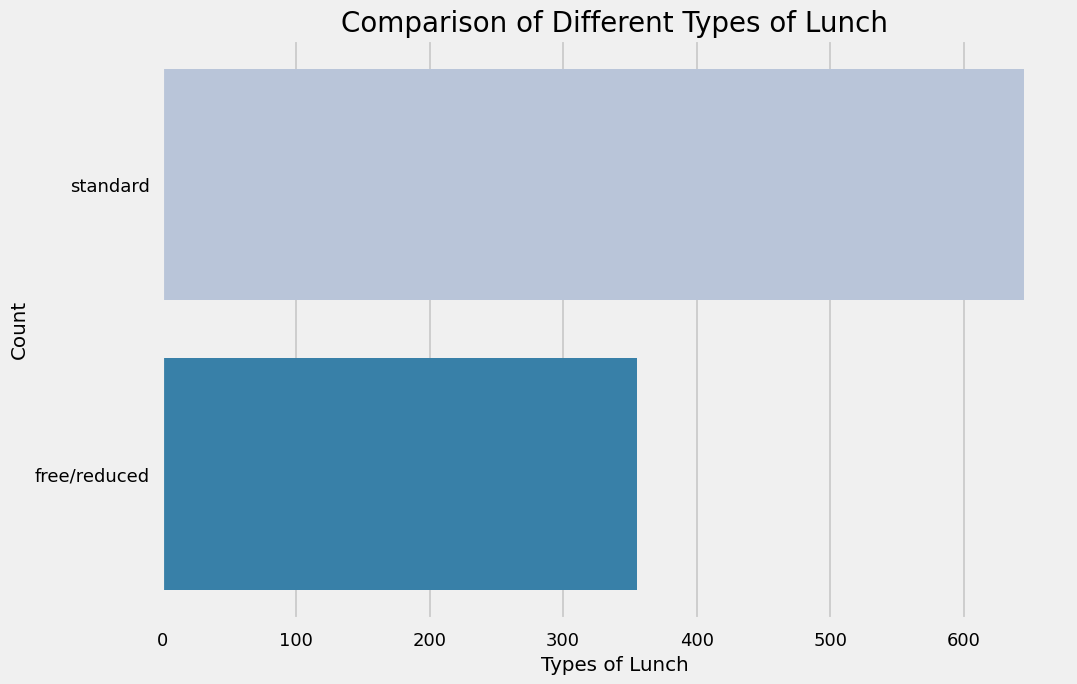

In [69]:
# Create new figure
plt.rcParams['figure.figsize'] = (15, 9)

# Select specific style
plt.style.use('seaborn-v0_8-talk')

# Create a count plot of the types of lunch
sns.countplot(y=df['lunch'],
              hue=df['lunch'], 
              palette='PuBu')

# Adding title and labels
plt.title('Comparison of Different Types of Lunch', 
          fontweight=30, 
          fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count');

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

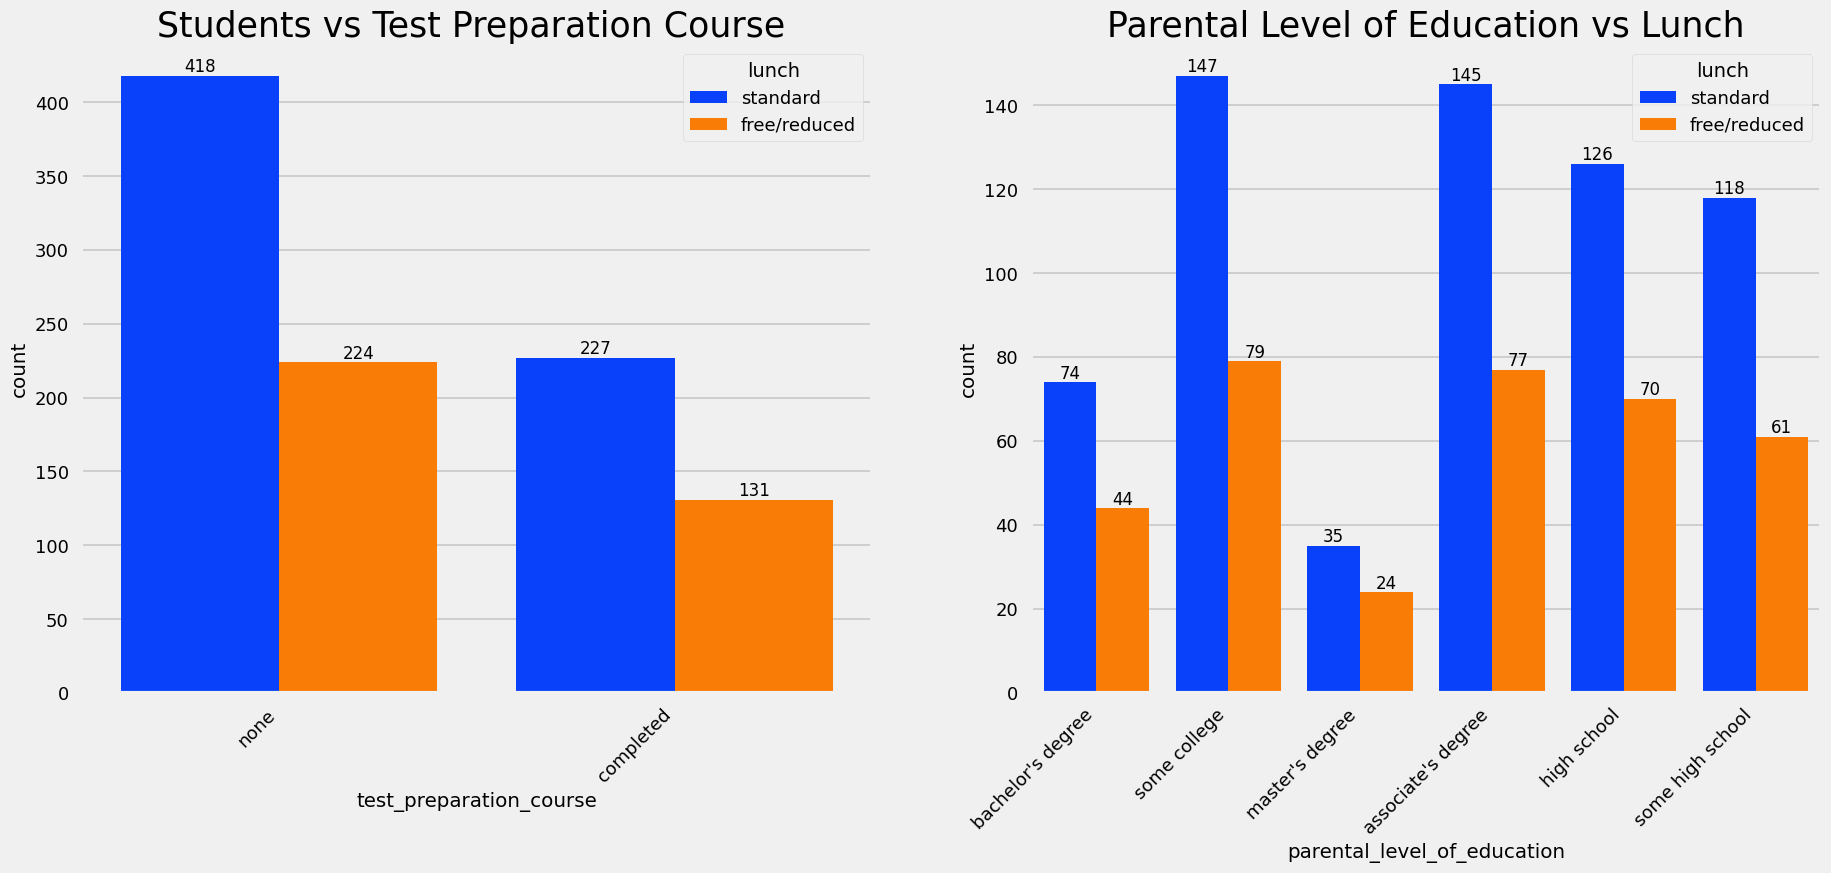

In [87]:
# Create new figure
fig, ax = plt.subplots(1,2,figsize=(20,8))

# Plot a count plot of test preparation course
sns.countplot(x=df['test_preparation_course'],
              hue=df['lunch'],
              data=df,
              palette='bright',
              saturation=0.95,
              ax=ax[0])

# Set the title of the plot
ax[0].set_title('Students vs Test Preparation Course ',
                color='black',
                size=25)

# Rotate x-axis labels
for label in ax[0].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

# Loop through the containers to add the count labels on the bars
for container in ax[0].containers:
    ax[0].bar_label(container,
                    color='black',
                    size=12)

# Plot a count plot of parental level of education
sns.countplot(x=df['parental_level_of_education'],
              data=df,
              palette='bright',
              hue=df['lunch'],
              saturation=0.95,
              ax=ax[1])

# Set the title of the plot
ax[1].set_title('Parental Level of Education vs Lunch',
                color='black',
                size=25)

# Rotate x-axis labels
for label in ax[1].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

# Loop through the containers to add the count labels on the bars
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=12)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

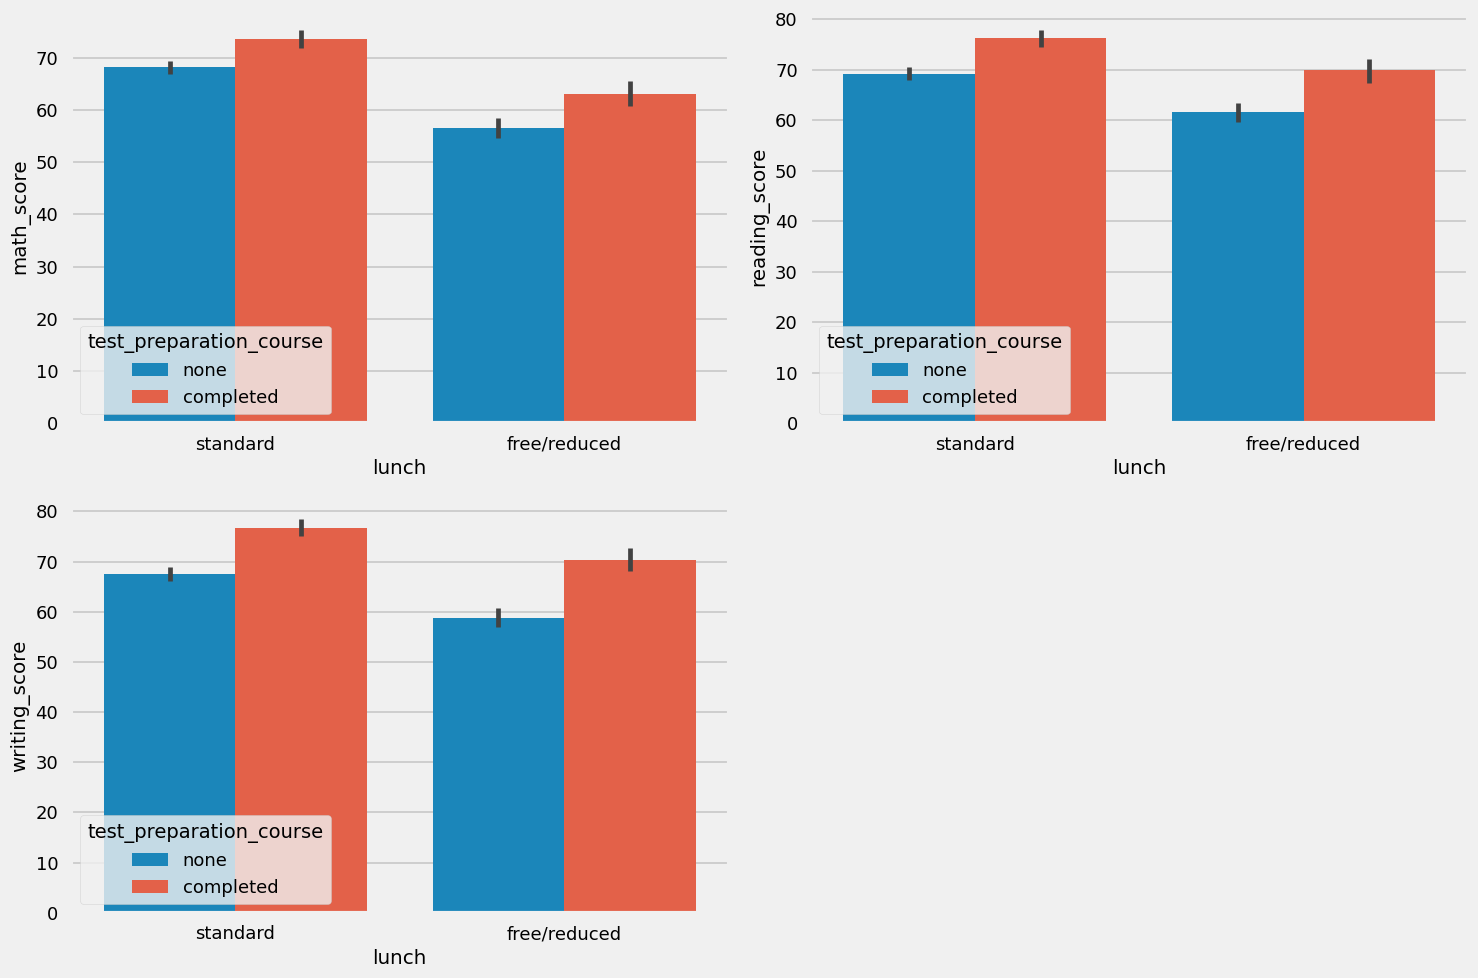

In [105]:
# Create new figure
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Plot a count plot of the test preparation course
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], 
             y=df['math_score'], 
             hue=df['test_preparation_course'])

plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], 
             y=df['reading_score'], 
             hue=df['test_preparation_course'])

plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], 
             y=df['writing_score'], 
             hue=df['test_preparation_course'])

# Remove the unused subplot (2, 2, 4)
fig.delaxes(axs[1, 1])

# Adjust layout to prevent overlap
plt.tight_layout();


#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

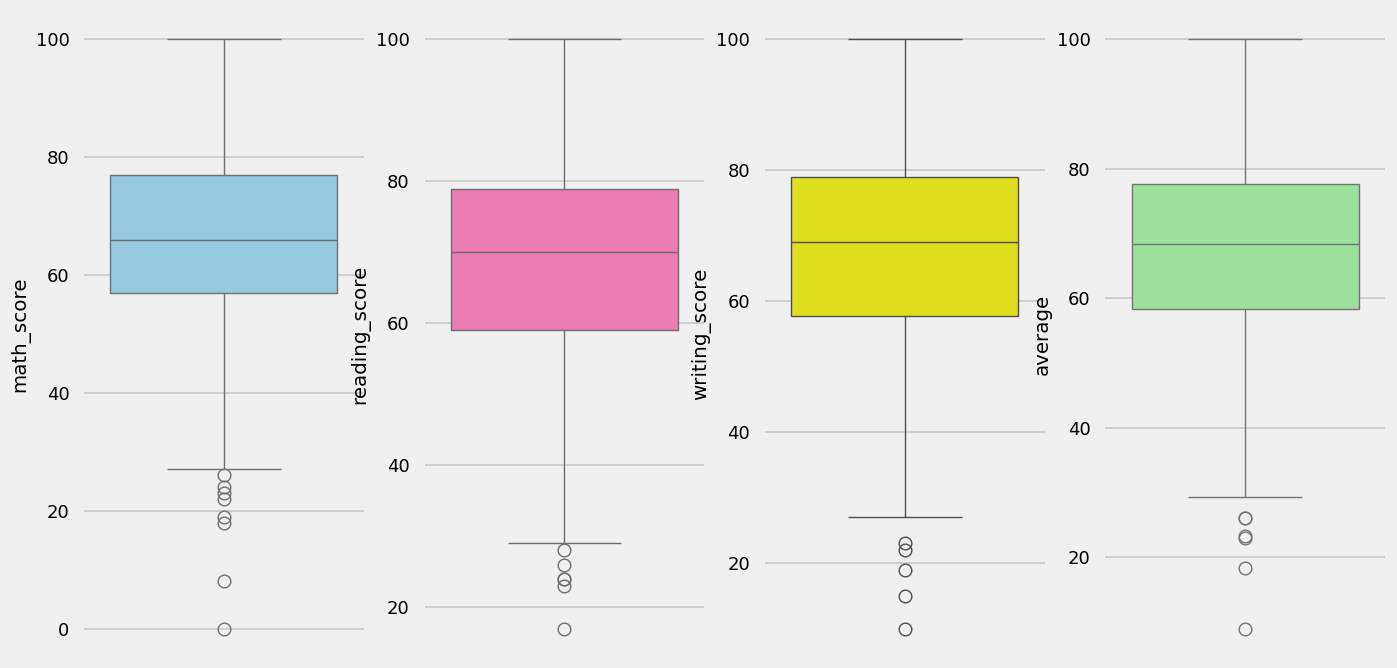

In [109]:
# Create new figure
plt.subplots(1,4,figsize=(15,8))

# Plot a boxplot of the math scores
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')

# Plot a boxplot of the reading scores
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')

# Plot a boxplot of the writing scores
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')

# Plot a boxplot of the average scores
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen');

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

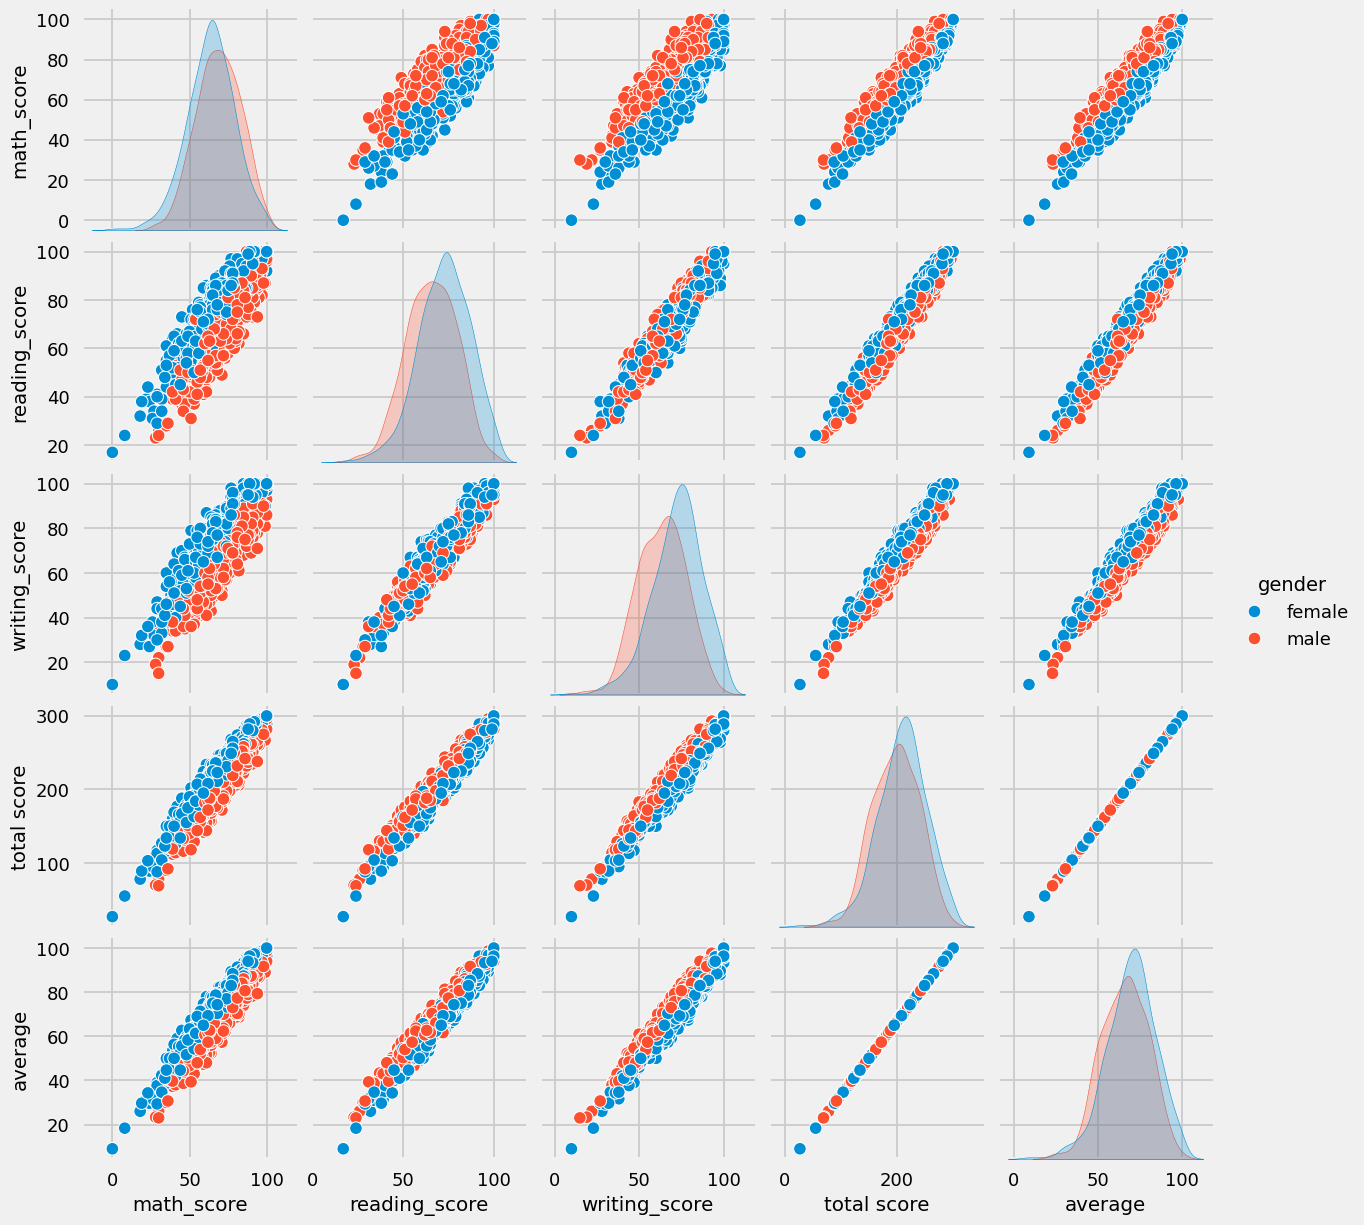

In [111]:
# Create a pairplot of the data identifying the gender
sns.pairplot(df,
             hue='gender');

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.